In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\Technical analysis\\NEDL_Omega_Ratio.xlsx')
df=df.rename(columns=df.iloc[0])
df=df[1:]
df=df.iloc[:,0:5]
df=df[-100:-85]#df[30:45]#df[30:45]#df[100:115]#df[45:65]#
df

,NaN,TSLA,AAPL,MSFT,WMT
2418,2020-04-22,146.421997,68.71476,172.620804,130.47728
2419,2020-04-23,141.126007,68.448463,170.531677,127.443153
2420,2020-04-24,145.029999,70.424545,173.645462,128.345459
2421,2020-04-27,159.75,70.474319,173.148056,127.215103
2422,2020-04-28,153.824005,69.33197,168.930023,126.917641
2423,2020-04-29,160.102005,71.6092,176.510529,122.55484
2424,2020-04-30,156.376007,73.119873,178.281311,120.522179
2425,2020-05-01,140.264008,71.942688,173.665375,121.880592
2426,2020-05-04,152.238007,72.960594,177.913223,122.653999
2427,2020-05-05,153.641998,74.055649,179.823273,123.675293


In [3]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = index[0]
    tmp_min_i = index[0]

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = index[i]
                
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [tmp_max_i, tmp_max+tmp_max*0.001]
                tops.append(top)
                x.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = index[i]
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = index[i]
                
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [tmp_min_i, tmp_min-tmp_min*0.001]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = index[i]

    return tops,bottoms,x

In [4]:
tops, bottoms,x = directional_change(df['AAPL'].to_numpy(), df['AAPL'].to_numpy(),df.index.to_numpy(),df['AAPL'].to_numpy(), 0.01)
tops,bottoms

([[2421, 70.544793319], [2424, 73.192992873], [2431, 78.68937476400001]],
 [[2422, 69.26263803], [2425, 71.87074531200001]])

In [5]:
tp=pd.DataFrame()
bt=pd.DataFrame()
tp[['Date','Price']]=tops
bt[['Date','Price']]=bottoms
bt

,Date,Price
0,2422.0,69.262638
1,2425.0,71.870745


In [6]:
tp

,Date,Price
0,2421.0,70.544793
1,2424.0,73.192993
2,2431.0,78.689375


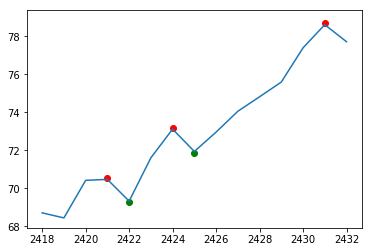

In [7]:
plt.plot(df['AAPL'].index.values,df['AAPL'].values)
plt.scatter(tp.Date,tp.Price.values,color='r')
plt.scatter(bt.Date,bt.Price.values,color='g')
#plt.plot(tp.index[-4:],np.y),color='r')

In [8]:
def para(tops,bottoms,parallel):
    total_length=len(tops)+len(bottoms)
    if len(bottoms)>=2 and len(tops)>=2 and total_length>=4:
        slope_lows,interc_lows=np.polyfit([i for i in bt.Date],[i for i in bt.Price], 1)
        slope_highs,interc_highs=np.polyfit([i for i in tp.Date],[i for i in tp.Price], 1)
        if not (parallel>0) or abs((slope_lows-slope_highs)/(slope_highs+slope_lows)/2)<parallel:
            return(slope_lows,interc_lows,slope_highs,interc_highs)
    return(0,0,0,0)

In [9]:
para(tops,bottoms,0.1)

(0.8693690940001962,
 -2036.3493076384752,
 0.8092726984115023,
 -1888.613664228698)